In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
le = LabelEncoder()

In [7]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['species'].unique()

array([0, 1, 2])

In [9]:
df = df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [16]:
clf = LogisticRegression(multi_class='multinomial')

In [17]:
clf.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [30]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [22]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [23]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,11,0,0
1,0,13,0
2,0,1,5


In [28]:
# prediction
query = np.array([[5.9,5.1]])
clf.predict_proba(query)

array([[4.05590734e-04, 2.55353855e-01, 7.44240554e-01]])

In [32]:
#gives the index number of highest predicted query
clf.predict(query)

array([2])

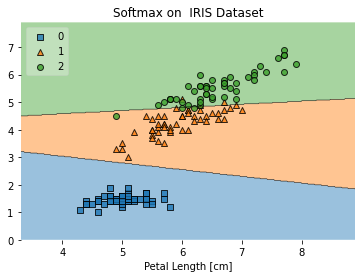

In [34]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, clf, legend=2)
plt.xlabel('Sepal Length [cm]')
plt.xlabel('Petal Length [cm]')
plt.title("Softmax on  IRIS Dataset")

plt.show()